In [15]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import math

from hurst import compute_Hc, random_walk

In [9]:
# yf data

# url of the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(url)[0]

tickers.head()

ticker_symbols = tickers['Symbol'].to_list()
# Clean the symbols
ticker_symbols = [ticker.replace(".","-") for ticker in ticker_symbols]

# Get the data for this tickers from yfinance
data = yf.download(ticker_symbols,start='2000-1-1',end='2025-1-1', auto_adjust=True)['Close']
data.head()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['MCHP']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 165073 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['CBRE']: Timeout('Failed to perform, curl: (28) Operation timed out after 10002 milliseconds with 92294 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.199894,0.840094,NaN,NaN,8.170223,1.215037,NaN,16.274672,27.847198,6.116471,...,11.113999,NaN,6.680138,17.406456,NaN,NaN,4.567841,NaN,25.027779,NaN
2000-01-04,39.899895,0.769266,NaN,NaN,7.936791,1.208433,NaN,14.909400,26.438419,6.052755,...,10.696475,NaN,6.833958,17.073044,NaN,NaN,4.476025,NaN,24.666668,NaN
2000-01-05,37.424889,0.780523,NaN,NaN,7.922200,1.320692,NaN,15.204176,26.824385,5.957186,...,11.263115,NaN,7.097646,18.003798,NaN,NaN,4.498980,NaN,25.138889,NaN
2000-01-06,35.999916,0.712978,NaN,NaN,8.199403,1.307485,NaN,15.328290,26.091057,5.989043,...,11.789988,NaN,7.031722,18.934551,NaN,NaN,4.460722,NaN,23.777779,NaN
2000-01-07,38.999889,0.746750,NaN,NaN,8.286942,1.380124,NaN,16.072987,26.824385,6.084610,...,11.402286,NaN,7.031722,18.878979,NaN,NaN,4.361257,NaN,23.513889,NaN


In [10]:
spe_data = data['AAPL']


H=0.6411, c=0.8932


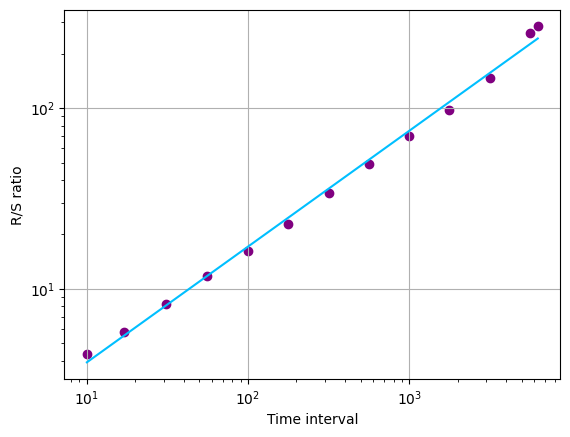

In [11]:
# R/S
log_return = np.log(spe_data / spe_data.shift(1)).dropna()

def compute_RC(log_return):
    # Evaluate Hurst equation
    H, c, data = compute_Hc(log_return, kind='change', simplified=True)
    print("H={:.4f}, c={:.4f}".format(H,c))
    plot_RC(H,c,data)

def plot_RC(H,c,data):
    # Plot
    f, ax = plt.subplots()
    ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    ax.scatter(data[0], data[1], color="purple")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time interval')
    ax.set_ylabel('R/S ratio')
    ax.grid(True)
    plt.show()

compute_RC(log_return)


H=0.4910, c=1.3301
H=0.4386, c=1.4858
H=0.5391, c=1.0874
H=0.6577, c=0.7467
H=0.6651, c=0.8804
H=0.6024, c=1.0589
H=0.5554, c=1.1963
H=0.6133, c=1.0852
H=0.5480, c=1.2012
H=0.7433, c=0.7547
H=0.5629, c=1.2376
H=0.3927, c=1.9310
H=0.6221, c=1.1097
H=0.4744, c=1.6340
H=0.6158, c=1.0841
H=0.4283, c=1.5957
H=0.4155, c=2.0096
H=0.6900, c=0.8902
H=0.5639, c=1.2428
H=0.6891, c=0.8466
H=0.6411, c=0.9081
H=0.5703, c=1.1019
H=0.4159, c=1.8531
H=0.6914, c=0.8404
H=0.5830, c=1.0967


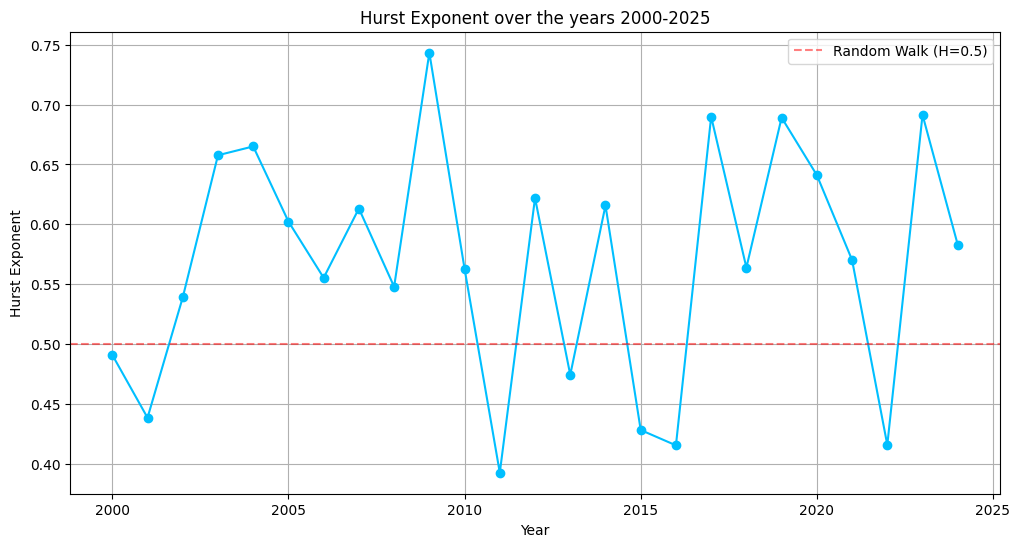

In [12]:
# sliding window R/S
# every 365 days start a new regime (from year 2000 to 2025)

years = []
hurst_values = []

for year in range(2000, 2025):
    start_date = f"{year}-01-01"
    end_date = f"{year+1}-01-01"
    data = spe_data[start_date:end_date]
    log_d = np.log(data / data.shift(1)).dropna()
    H, c, _ = compute_Hc(log_d, kind='change', simplified=True)
    print(f"H={H:.4f}, c={c:.4f}")
    years.append(year)
    hurst_values.append(H)

# Plot Hurst exponent over time
f, ax = plt.subplots(figsize=(12, 6))
plt.title("Hurst Exponent over the years 2000-2025")
ax.plot(years, hurst_values, color="deepskyblue", marker='o')
ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Random Walk (H=0.5)')
ax.set_xlabel('Year')
ax.set_ylabel('Hurst Exponent')
ax.grid(True)
ax.legend()
plt.show()


[  12   21   37   67  120  213  379  674 1200]


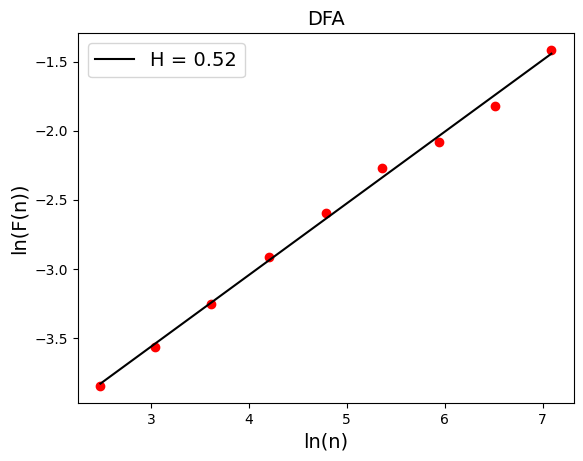

In [41]:
# DFA
from fathon import fathonUtils as fu
import fathon

r = np.asarray(log_return, dtype=float)
r = r[np.isfinite(r)]
a = fu.toAggregated(r)
dfa = fathon.DFA(a)

N = len(log_return)

min_window = 12
max_window = int(N // 4)
window_sizes = np.array([int(10**x) for x in np.arange(math.log10(min_window), math.log10(max_window), 0.25)])
print(window_sizes)

revSeg = True
polOrd = 1

n, F = dfa.computeFlucVec(window_sizes, revSeg=revSeg, polOrd=polOrd)

H, H_intercept = dfa.fitFlucVec()

plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()


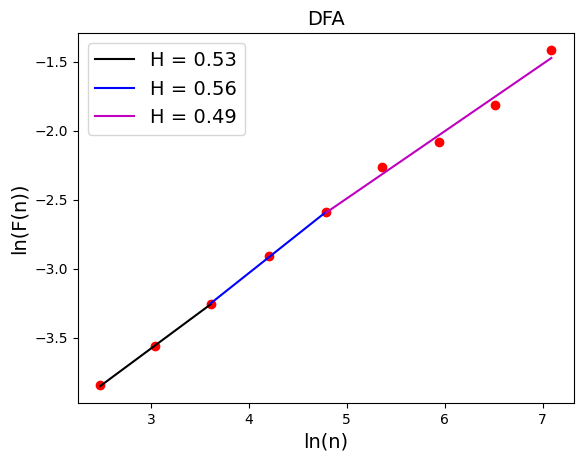

In [55]:
starting = n[0]
ending_1_month = 0
ending_1_quarter = 0 
ending_2_years = 0

for i in range(len(n)):
    if ending_1_month == 0 and n[i] > 30*0.8:
        ending_1_month = n[i]
        continue
        
    if ending_1_quarter == 0 and n[i] > 90*0.8:
        ending_1_quarter = n[i]
        continue
        
    # if ending_2_years == 0 and n[i] > 700*0.8:
    #     ending_2_years = n[i]
    #     break
    

limits_list = np.array([
    [starting,   ending_1_month],    # 1 month ~ 30 days
    [ending_1_month,  ending_1_quarter],    # 1 quarter ~ 90 days
    [ending_1_quarter, 1200],  
], dtype=int)
list_H, list_H_intercept = dfa.multiFitFlucVec(limits_list)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log(n), np.log(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

This is fathon v1.3.3


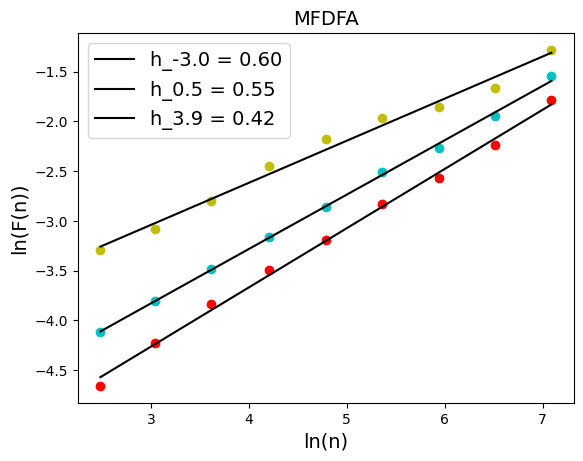

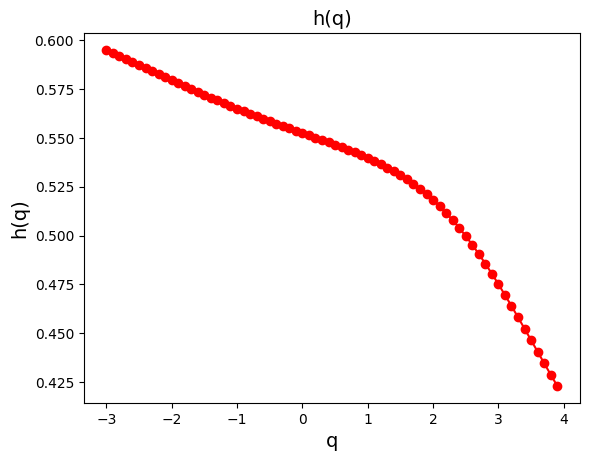

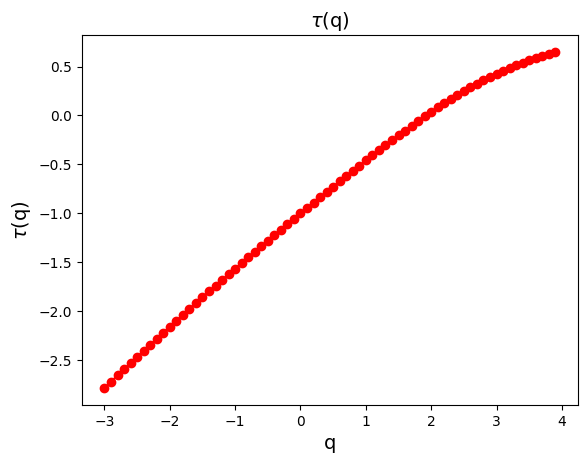

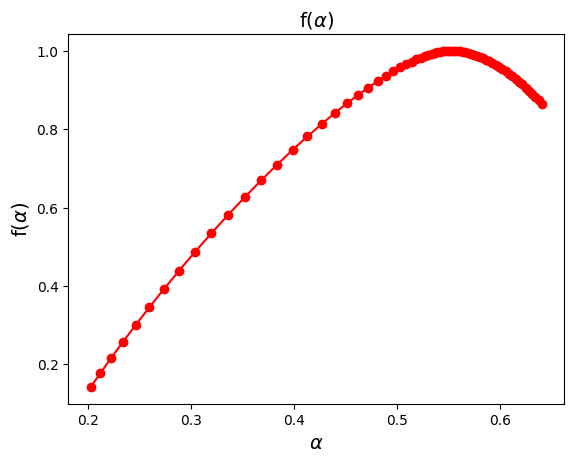

In [56]:
# MFDFA


print('This is fathon v{}'.format(fathon.__version__))

a = fu.toAggregated(log_return)
pymfdfa = fathon.MFDFA(a)

qs = np.arange(-3, 4, 0.1)
revSeg = True
polOrd = 1

n, F = pymfdfa.computeFlucVec(window_sizes, qs, revSeg=revSeg, polOrd=polOrd)

list_H, list_H_intercept = pymfdfa.fitFlucVec()

plt.plot(np.log(n), np.log(F[0, :]), 'ro')
plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), 'k-', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n), np.log(F[half_idx, :]), 'co')
plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
         'k-', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
plt.plot(np.log(n), np.log(F[-1, :]), 'yo')
plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), 'k-',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

plt.plot(qs, list_H, 'ro-')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.title('h(q)', fontsize=14)
plt.show()

tau = pymfdfa.computeMassExponents()

plt.plot(qs, tau, 'ro-')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
plt.title('$\\tau$(q)', fontsize=14)
plt.show()

alpha, mfSpect = pymfdfa.computeMultifractalSpectrum()

plt.plot(alpha, mfSpect, 'ro-')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('f($\\alpha$)', fontsize=14)
plt.title('f($\\alpha$)', fontsize=14)
plt.show()

In [ ]:
# GHE



In [ ]:
# ML ? 